<a href="https://colab.research.google.com/github/wilferalexander/creditscoring/blob/main/CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CREDIT SCORING PREDICTION**

---



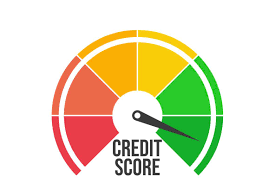

**Descripción del Proyecto**

Credit Scoring es un proyecto de machine learning enfocado en la predicción de la solvencia crediticia de los individuos. Este proyecto tiene como objetivo desarrollar un modelo predictivo que ayude a las instituciones financieras a tomar decisiones informadas sobre la concesión de créditos.



CREDIT SCORING PREDICTION

La importancia de reducir el riesgo crediticio es clave en el sector financiero. Nuestro cliente, una institución financiera alemana, ha reconocido la necesidad de adoptar enfoques innovadores para mejorar su capacidad de evaluar el riesgo crediticio de los clientes. La misión principal es identificar y clasificar a los clientes en dos categorías: "Buen Cliente (0)" y "Mal Cliente (1)". Este análisis permitirá a la institución tomar decisiones informadas y mitigar el riesgo de pérdidas crediticias.

---

Tus tareas principales serán:

1. **Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

2. **Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

3. **Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

4. **Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la predicción de la solvencia crediticia.
---


#**1. Configuración del Ambiente**


---


In [80]:
#Montamos la unidad de google donde se encuentra en dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#Importamos librerias necesarias
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.express as px
import plotly.graph_objects as go
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
global df_banco, resultados

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

#**2. Preprocesamiento de Datos**


---

In [81]:
df_banco = pd.read_csv('/content/drive/MyDrive/Alura/Ciencias_de_datos/Challange/Credit-Scoring-Prediction/Creditscoring/german_credit.csv')
df_banco.sample(5)

default account_check_status  duration_in_month  \
687        0    0 <= ... < 200 DM                 36   
872        0               < 0 DM                 24   
743        0               < 0 DM                 24   
200        0  no checking account                  9   
630        0               < 0 DM                 24   

                                        credit_history  \
687                    delay in paying off in the past   
872  critical account/ other credits existing (not ...   
743            all credits at this bank paid back duly   
200  critical account/ other credits existing (not ...   
630           existing credits paid back duly till now   

                          purpose  credit_amount                savings  \
687                     car (new)           2862    100 <= ... < 500 DM   
872                      business           1382    100 <= ... < 500 DM   
743              radio/television           2483  500 <= ... < 1000 DM    
200  (vacation - does not exist?)            936  500 <= ... < 1000 DM    
630           domestic appliances           3660           ... < 100 DM   

      present_emp_since  installment_as_income_perc  \
687       .. >= 7 years                           4   
872  4 <= ... < 7 years                           4   
743  1 <= ... < 4 years                           4   
200       .. >= 7 years                           4   
630  1 <= ... < 4 years                           2   

                     personal_status_sex other_debtors  present_res_since  \
687                        male : single          none                  3   
872                        male : single          none                  1   
743                        male : single          none                  4   
200                        male : single          none                  2   
630  female : divorced/separated/married          none                  4   

                                              property  age  \
687                              unknown / no property   30   
872                                        real estate   26   
743                                        real estate   22   
200  if not A121/A122 : car or other, not in attrib...   52   
630  if not A121/A122 : car or other, not in attrib...   28   

    other_installment_plans   housing  credits_this_bank  \
687                    none  for free                  1   
872                    none       own                  2   
743                  stores       own                  1   
200                    none       own                  2   
630                    none       own                  1   

                             job  people_under_maintenance  \
687  skilled employee / official                         1   
872  skilled employee / official                         1   
743  skilled employee / official                         1   
200  skilled employee / official                         1   
630  skilled employee / official                         1   

                                     telephone foreign_worker  
687                                       none            yes  
872  yes, registered under the customers name             yes  
743  yes, registered under the customers name             yes  
200  yes, registered under the customers name             yes  
630                                       none            yes

### 2.1 Validación del dataframe

---


In [82]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

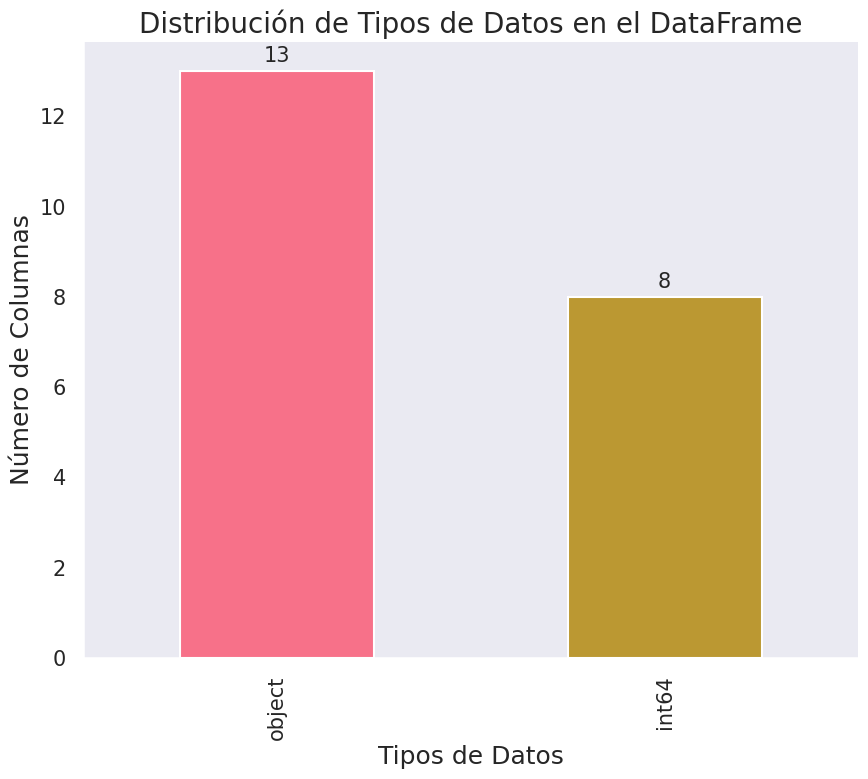

In [37]:
# Establecemos el estilo de Seaborn
sns.set(style="dark", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_banco.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [83]:
#Información de los datos
print("Número de filas: ",df_banco.shape[0])
print("Número de Columnas:",df_banco.shape[1])
print("Datos Duplicados",df_banco.duplicated().sum())
print("Variables Categóricas: ",df_banco.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_banco.select_dtypes(exclude='object').shape[1])

Número de filas:  1000
Número de Columnas: 21
Datos Duplicados 0
Variables Categóricas:  13
Variables Numéricas:  8


Contamos con 13 variables categoricas y 8 variables numericas

In [84]:
## Validando las columnas de nuestro dataframe
df_banco.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [85]:
df_banco.describe().transpose()

count      mean          std    min     25%  \
default                     1000.0     0.300     0.458487    0.0     0.0   
duration_in_month           1000.0    20.903    12.058814    4.0    12.0   
credit_amount               1000.0  3271.258  2822.736876  250.0  1365.5   
installment_as_income_perc  1000.0     2.973     1.118715    1.0     2.0   
present_res_since           1000.0     2.845     1.103718    1.0     2.0   
age                         1000.0    35.546    11.375469   19.0    27.0   
credits_this_bank           1000.0     1.407     0.577654    1.0     1.0   
people_under_maintenance    1000.0     1.155     0.362086    1.0     1.0   

                               50%      75%      max  
default                        0.0     1.00      1.0  
duration_in_month             18.0    24.00     72.0  
credit_amount               2319.5  3972.25  18424.0  
installment_as_income_perc     3.0     4.00      4.0  
present_res_since              3.0     4.00      4.0  
age                           33.0    42.00     75.0  
credits_this_bank              1.0     2.00      4.0  
people_under_maintenance       1.0     1.00      2.0

In [86]:
#Eliminar duplicados
#Verificamos si hay duplicados
print('Total de duplicados en el dataframe es de' ,df_banco.duplicated().sum(),'.')

Total de duplicados en el dataframe es de 0 .


### 2.2 Tratamiento de Valores nulos

---


In [87]:
#datos nulos
df_banco.isnull().sum().sort_values(ascending=False)

default                       0
present_res_since             0
telephone                     0
people_under_maintenance      0
job                           0
credits_this_bank             0
housing                       0
other_installment_plans       0
age                           0
property                      0
other_debtors                 0
account_check_status          0
personal_status_sex           0
installment_as_income_perc    0
present_emp_since             0
savings                       0
credit_amount                 0
purpose                       0
credit_history                0
duration_in_month             0
foreign_worker                0
dtype: int64

Text(0, 0.5, 'Filas')

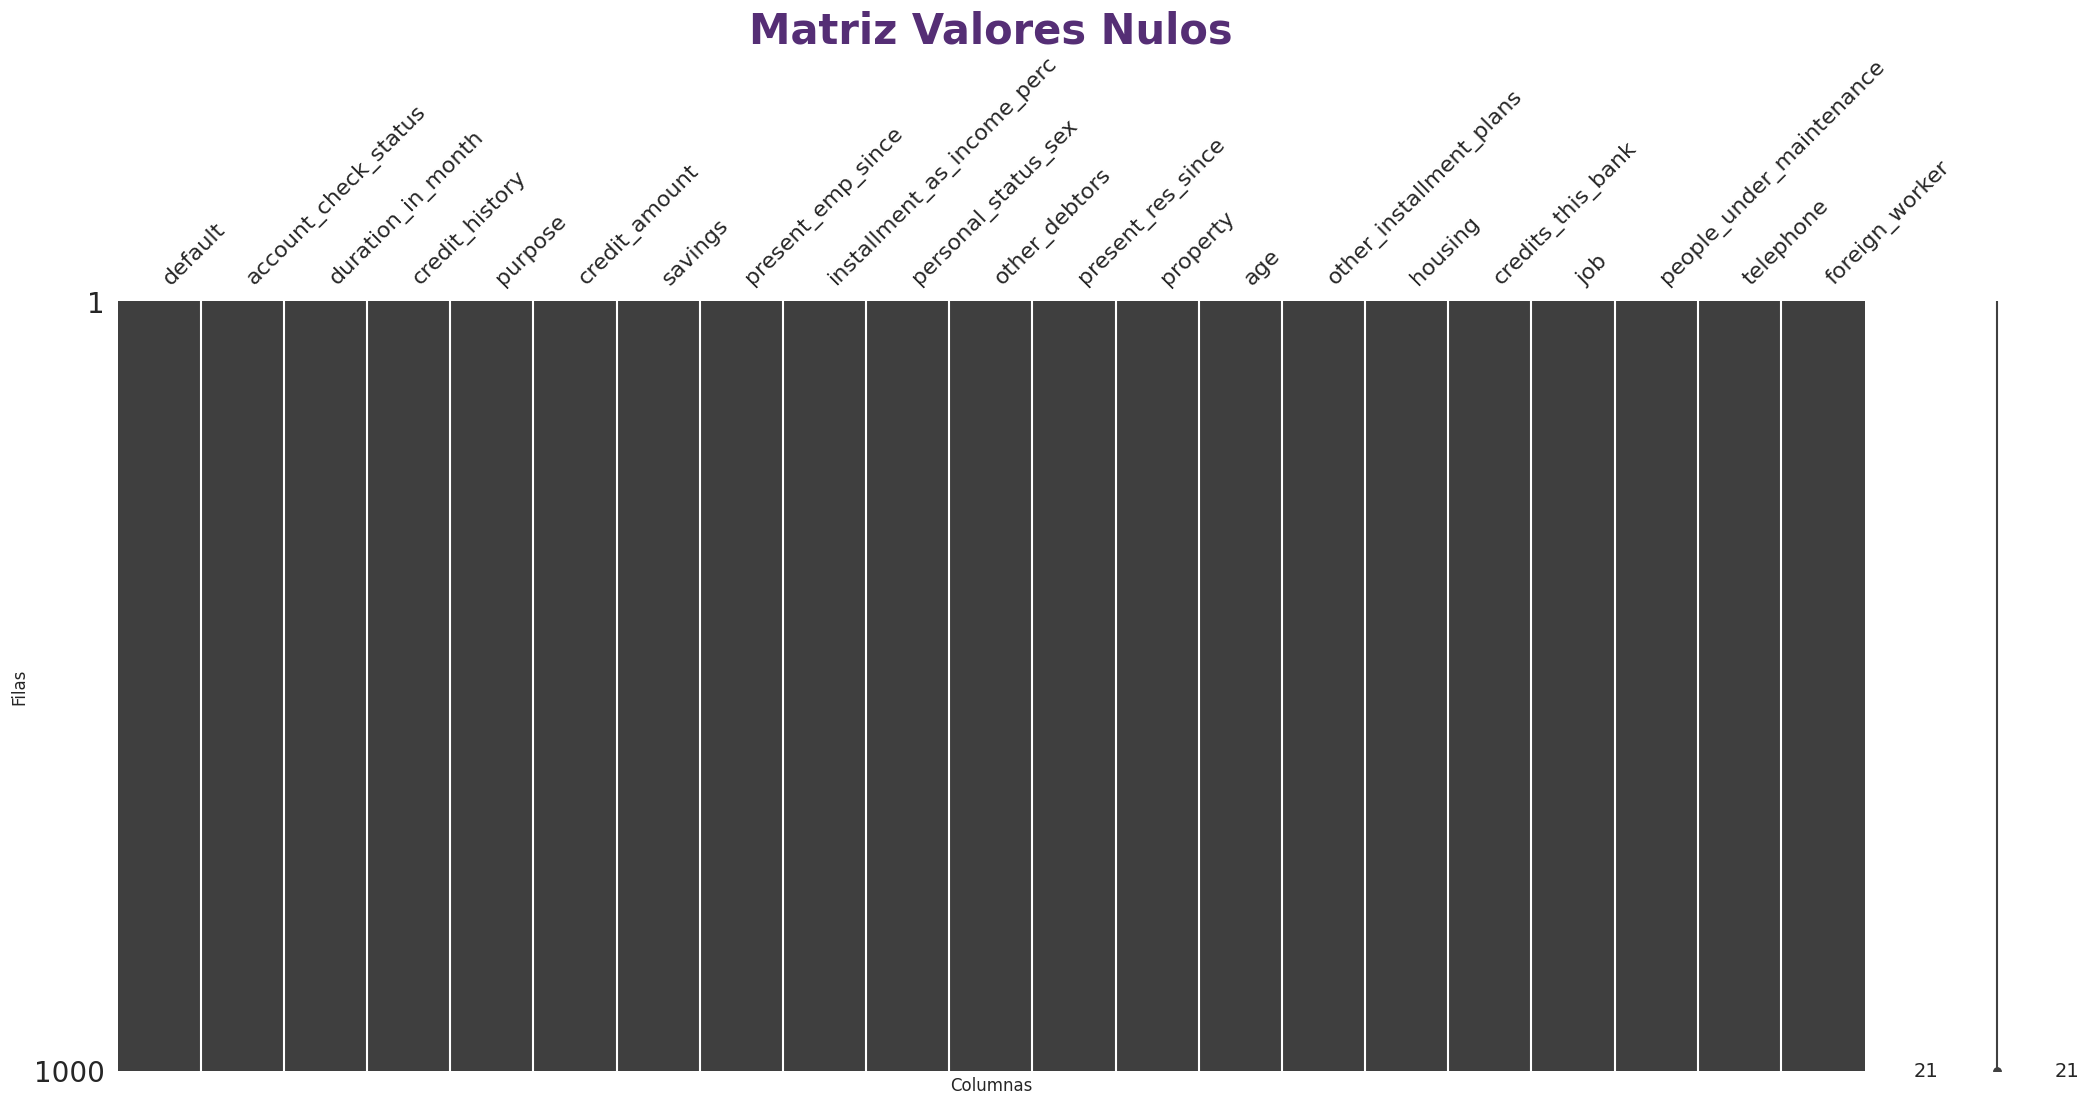

In [88]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_banco)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Observamos que no existe presencia de datos nulos.


In [89]:
df_banco.corr()

default  duration_in_month  credit_amount  \
default                     1.000000           0.214927       0.154739   
duration_in_month           0.214927           1.000000       0.624984   
credit_amount               0.154739           0.624984       1.000000   
installment_as_income_perc  0.072404           0.074749      -0.271316   
present_res_since           0.002967           0.034067       0.028926   
age                        -0.091127          -0.036136       0.032716   
credits_this_bank          -0.045732          -0.011284       0.020795   
people_under_maintenance   -0.003015          -0.023834       0.017142   

                            installment_as_income_perc  present_res_since  \
default                                       0.072404           0.002967   
duration_in_month                             0.074749           0.034067   
credit_amount                                -0.271316           0.028926   
installment_as_income_perc                    1.000000           0.049302   
present_res_since                             0.049302           1.000000   
age                                           0.058266           0.266419   
credits_this_bank                             0.021669           0.089625   
people_under_maintenance                     -0.071207           0.042643   

                                 age  credits_this_bank  \
default                    -0.091127          -0.045732   
duration_in_month          -0.036136          -0.011284   
credit_amount               0.032716           0.020795   
installment_as_income_perc  0.058266           0.021669   
present_res_since           0.266419           0.089625   
age                         1.000000           0.149254   
credits_this_bank           0.149254           1.000000   
people_under_maintenance    0.118201           0.109667   

                            people_under_maintenance  
default                                    -0.003015  
duration_in_month                          -0.023834  
credit_amount                               0.017142  
installment_as_income_perc                 -0.071207  
present_res_since                           0.042643  
age                                         0.118201  
credits_this_bank                           0.109667  
people_under_maintenance                    1.000000

#### 2.3 EDA VARIABLES CATEGÓRICAS

In [90]:
def graficos_eda_categoricos(cat):

  #calculamos el número de filas que necesitamos
  from math import ceil
  filas =ceil(cat.shape[1]/2)

  #definimos el grafico
  f, ax = plt.subplots(nrows= filas, ncols=  2, figsize = (16, filas * 6))

  #aplanamos para iterar por el grafico como si fuera 1 dimension en lugar de 2
  ax = ax.flat

  #creamos el bucle que crea los grafico

  for cada, variable in enumerate(cat):
    cat[variable].value_counts().plot.barh(ax= ax[cada])
    ax[cada].set_title(variable,fontsize= 12, fontweight = 'bold')
    ax[cada].tick_params(labelsize = 12)

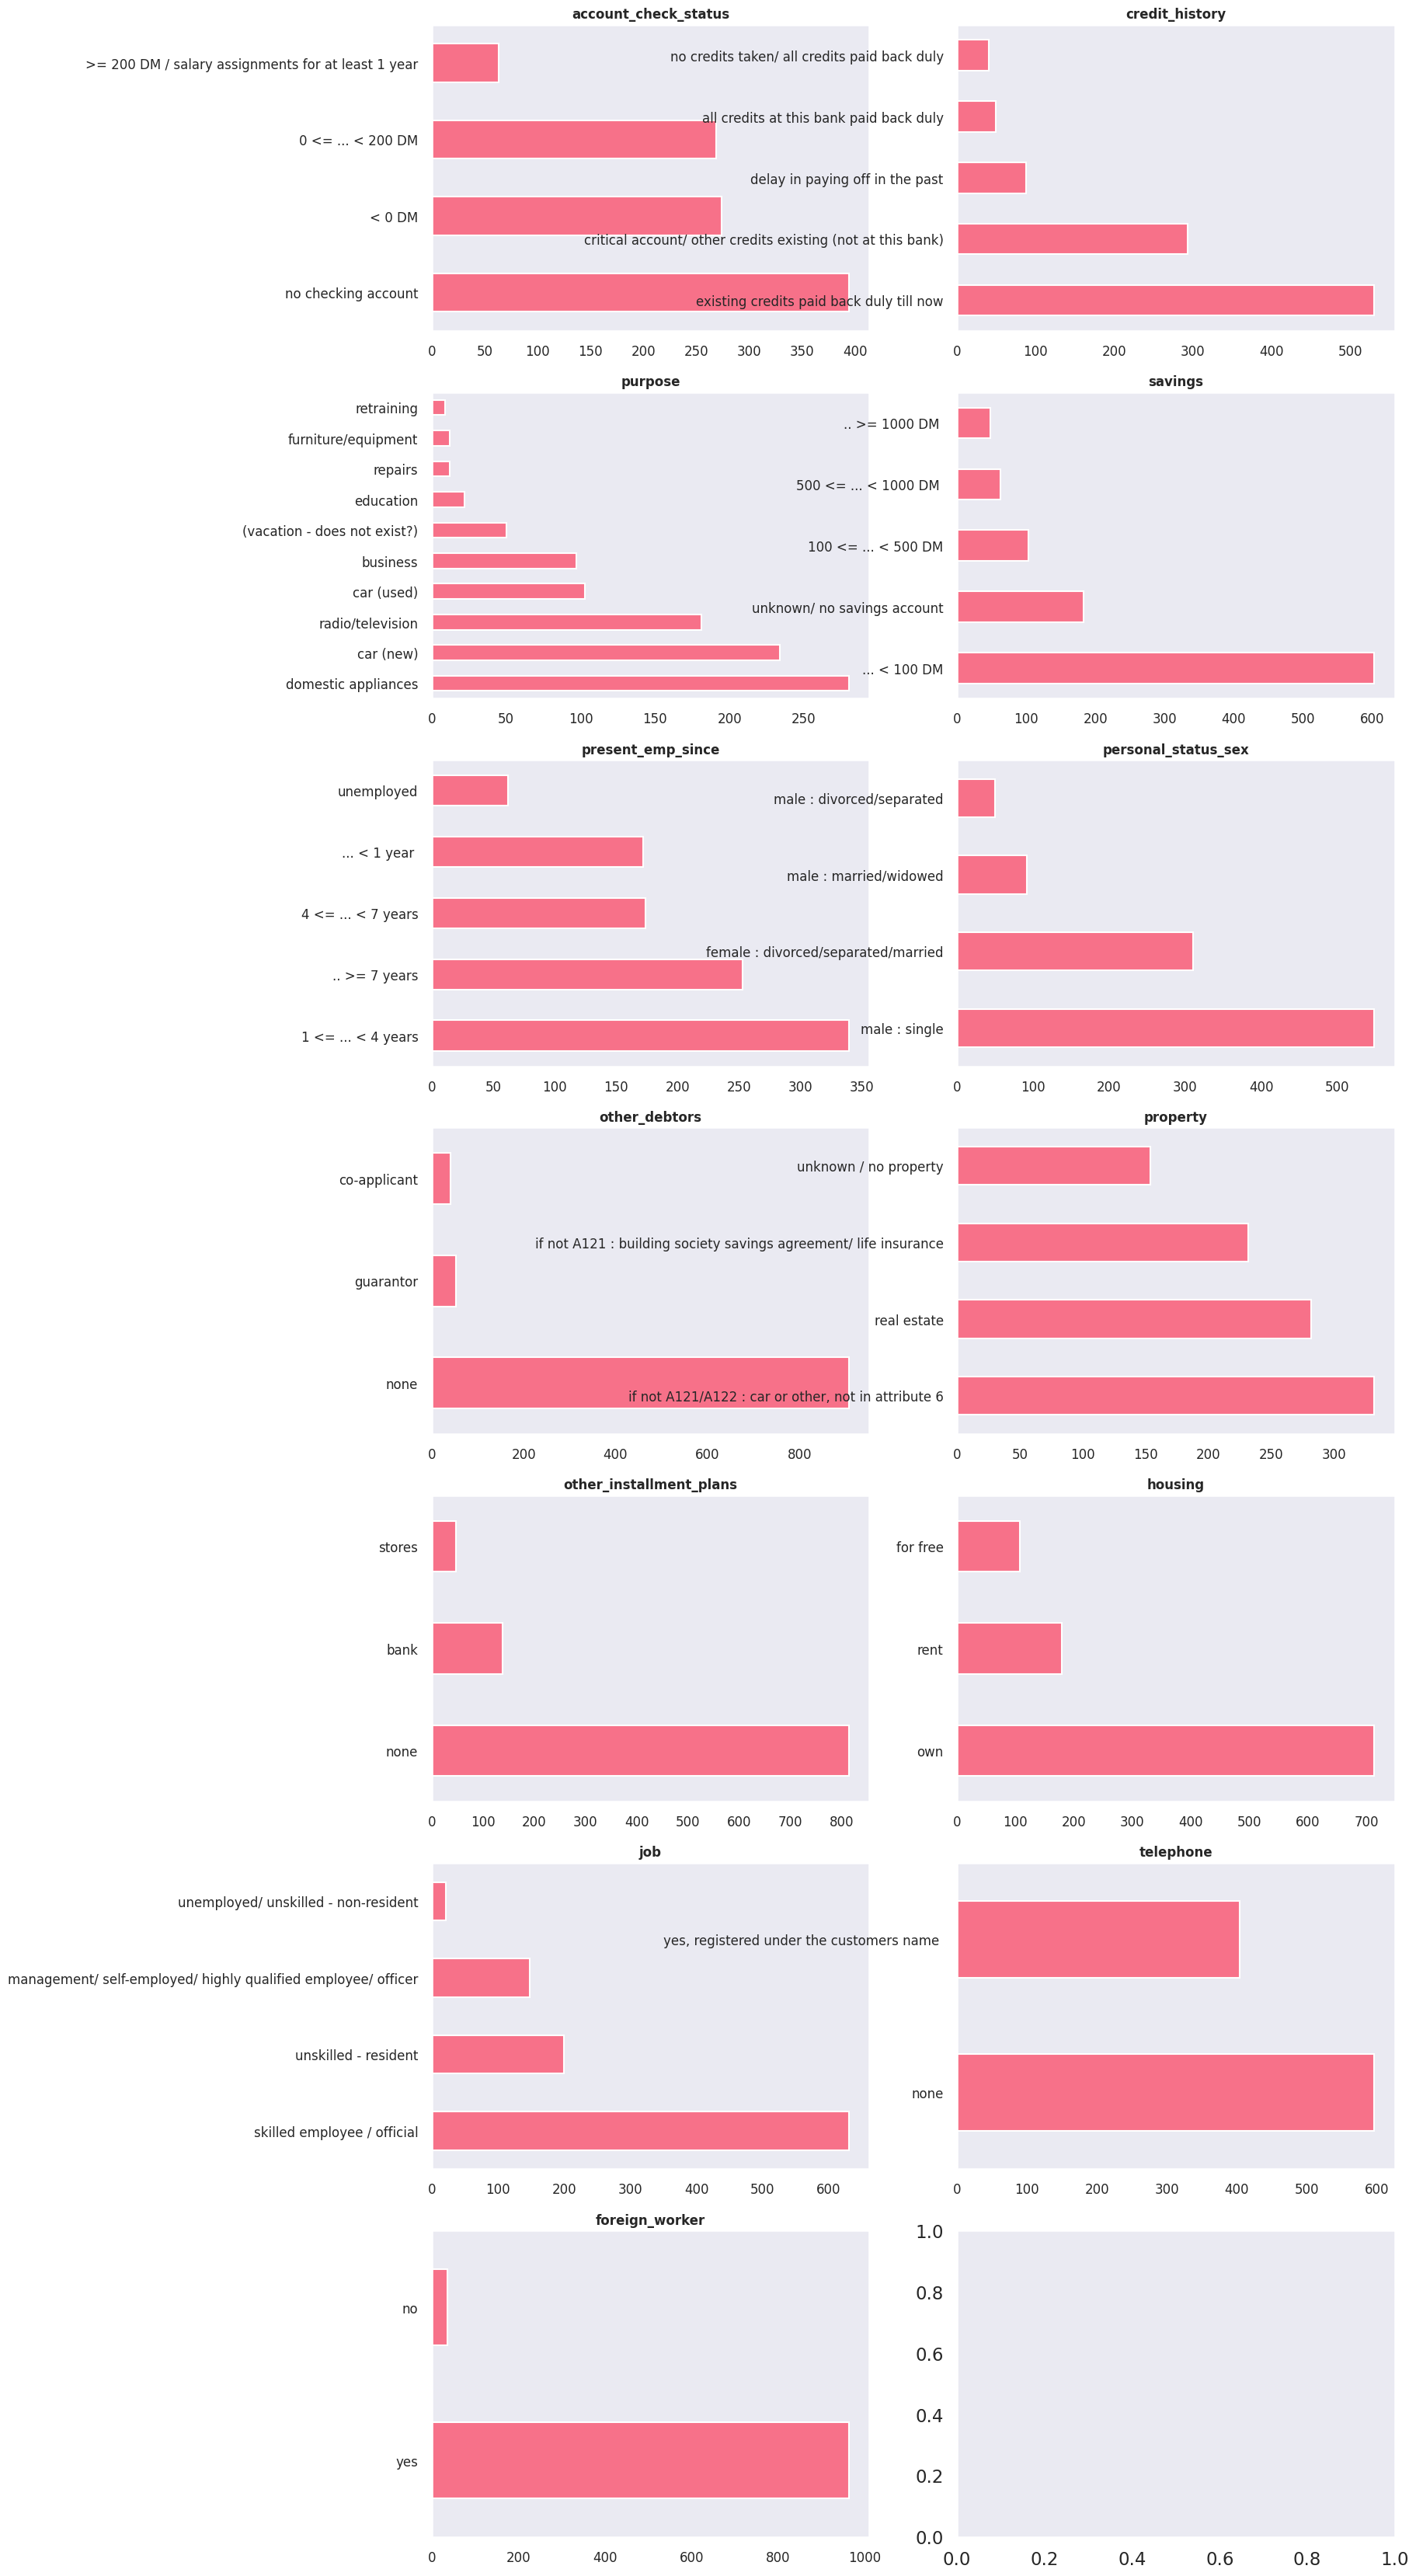

In [ ]:
graficos_eda_categoricos(df_banco.select_dtypes('O'))

#### 2.4 EDA VARIABLES NUMÉRICAS

---


In [91]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [92]:
estadisticos_cont(df_banco.select_dtypes('number'))

count      mean  median          std    min  \
default                     1000.0     0.300     0.0     0.458487    0.0   
duration_in_month           1000.0    20.903    18.0    12.058814    4.0   
credit_amount               1000.0  3271.258  2319.5  2822.736876  250.0   
installment_as_income_perc  1000.0     2.973     3.0     1.118715    1.0   
present_res_since           1000.0     2.845     3.0     1.103718    1.0   
age                         1000.0    35.546    33.0    11.375469   19.0   
credits_this_bank           1000.0     1.407     1.0     0.577654    1.0   
people_under_maintenance    1000.0     1.155     1.0     0.362086    1.0   

                               25%     50%      75%      max  
default                        0.0     0.0     1.00      1.0  
duration_in_month             12.0    18.0    24.00     72.0  
credit_amount               1365.5  2319.5  3972.25  18424.0  
installment_as_income_perc     2.0     3.0     4.00      4.0  
present_res_since              2.0     3.0     4.00      4.0  
age                           27.0    33.0    42.00     75.0  
credits_this_bank              1.0     1.0     2.00      4.0  
people_under_maintenance       1.0     1.0     1.00      2.0

In [93]:
def procesar_datos():
    global df_banco, resultados

    # Eliminar registros duplicados y guardar en df_banco
    df_banco = df_banco.drop_duplicates()

    # Eliminar valores nulos
    df_banco = df_banco.dropna()

    # Codificación de variables categóricas
    # Se crea un diccionario para cada columna categórica y se realiza la codificación

    # 'account_check_status' 'estado_comprobación_cuenta'
    a = { '< 0 DM': 1, '0 <= ... < 200 DM': 2, '>= 200 DM / salary assignments for at least 1 year': 3, 'no checking account': 4 }
    df_banco['account_check_status'] = df_banco['account_check_status'].map(a).astype(int)

    # 'credit_history'
    b = {'no credits taken/ all credits paid back duly': 1, 'all credits at this bank paid back duly': 2,
         'existing credits paid back duly till now': 3, 'delay in paying off in the past': 4,
         'critical account/ other credits existing (not at this bank)': 5}
    df_banco['credit_history'] = df_banco['credit_history'].map(b).astype(int)

    # 'purpose' 'objetivo'
    c = { 'car (new)': 1, 'car (used)': 2, 'furniture/equipment': 3, 'radio/television': 4,
          'domestic appliances' : 5, 'repairs': 6, 'education': 7, '(vacation - does not exist?)': 8,
          'retraining': 9, 'business' : 10, 'others':11 }
    df_banco['purpose'] = df_banco['purpose'].map(c).astype(int)

    # 'savings' 'Ahorros'
    d = { 'unknown/ no savings account': 1, '.. >= 1000 DM ': 2, '500 <= ... < 1000 DM ': 3,
          '100 <= ... < 500 DM': 4, '... < 100 DM' : 5 }
    df_banco['savings'] = df_banco['savings'].map(d).astype(int)

    # 'present_emp_since' 'empleados presentes desde'
    e = { '.. >= 7 years': 1, '4 <= ... < 7 years': 2, '1 <= ... < 4 years': 3,
          '... < 1 year ': 4, 'unemployed' : 5 }
    df_banco['present_emp_since'] = df_banco['present_emp_since'].map(e).astype(int)

    # 'personal_status_sex'
    f = { 'male : divorced/separated': 1, 'female : divorced/separated/married': 2,
          'male : single': 3, 'male : married/widowed': 4, 'female : single' : 5 }
    df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(f).astype(int)

    # 'other_debtors' 'Otros deudores'
    g = { 'none': 1, 'co-applicant': 2, 'guarantor': 3 }
    df_banco['other_debtors'] = df_banco['other_debtors'].map(g).astype(int)

    # 'property' 'propiedad'
    h = {'real estate': 1, 'if not A121 : building society savings agreement/ life insurance': 2,
         'if not A121/A122 : car or other, not in attribute 6': 3, 'unknown / no property': 4 }
    df_banco['property'] = df_banco['property'].map(h).astype(int)

    # 'other_installment_plans' 'otros planes de instalación'
    i = { 'bank': 1, 'stores': 2, 'none': 3 }
    df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(i).astype(int)

    # 'housing' 'Alojamiento'
    j = { 'rent': 1, 'own': 2, 'for free': 3 }
    df_banco['housing'] = df_banco['housing'].map(j).astype(int)

    # 'job' 'trabajo'
    k = { 'unemployed/ unskilled - non-resident': 1, 'unskilled - resident': 2,
          'skilled employee / official': 3, 'management/ self-employed/ highly qualified employee/ officer': 4 }
    df_banco['job'] = df_banco['job'].map(k).astype(int)

    # 'telephone'
    l = { 'none': 0, 'yes, registered under the customers name ': 1 }
    df_banco['telephone'] = df_banco['telephone'].map(l).astype(int)

    # 'foreign_worker'
    m = { 'no': 0, 'yes': 1 }
    df_banco['foreign_worker'] = df_banco['foreign_worker'].map(m).astype(int)


In [94]:
procesar_datos()
df_banco.sample(5)

default  account_check_status  duration_in_month  credit_history  \
907        0                     2                 36               3   
402        1                     4                 24               4   
320        1                     2                 30               5   
462        0                     2                 12               3   
618        1                     2                 30               3   

     purpose  credit_amount  savings  present_emp_since  \
907        8           3711        1                  3   
402       10           8648        5                  4   
320        1           4249        5                  5   
462        4           3017        5                  4   
618        4           3441        4                  3   

     installment_as_income_perc  personal_status_sex  other_debtors  \
907                           2                    4              1   
402                           2                    3              1   
320                           4                    4              1   
462                           3                    2              1   
618                           2                    2              2   

     present_res_since  property  age  other_installment_plans  housing  \
907                  2         3   27                        3        2   
402                  2         3   27                        1        2   
320                  2         3   28                        3        2   
462                  1         1   34                        3        1   
618                  4         3   21                        3        1   

     credits_this_bank  job  people_under_maintenance  telephone  \
907                  1    3                         1          0   
402                  2    3                         1          1   
320                  2    4                         1          0   
462                  1    4                         1          0   
618                  1    3                         1          0   

     foreign_worker  
907               1  
402               1  
320               1  
462               1  
618               1

In [95]:
#Verificamos si después de la sustitución quedó algún valor nulo
df_banco.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [96]:
#Verificamos si las estructuras de datos de las columnas son las correctas
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   default                     1000 non-null   int64
 1   account_check_status        1000 non-null   int64
 2   duration_in_month           1000 non-null   int64
 3   credit_history              1000 non-null   int64
 4   purpose                     1000 non-null   int64
 5   credit_amount               1000 non-null   int64
 6   savings                     1000 non-null   int64
 7   present_emp_since           1000 non-null   int64
 8   installment_as_income_perc  1000 non-null   int64
 9   personal_status_sex         1000 non-null   int64
 10  other_debtors               1000 non-null   int64
 11  present_res_since           1000 non-null   int64
 12  property                    1000 non-null   int64
 13  age                         1000 non-null   int64
 14  other_ins

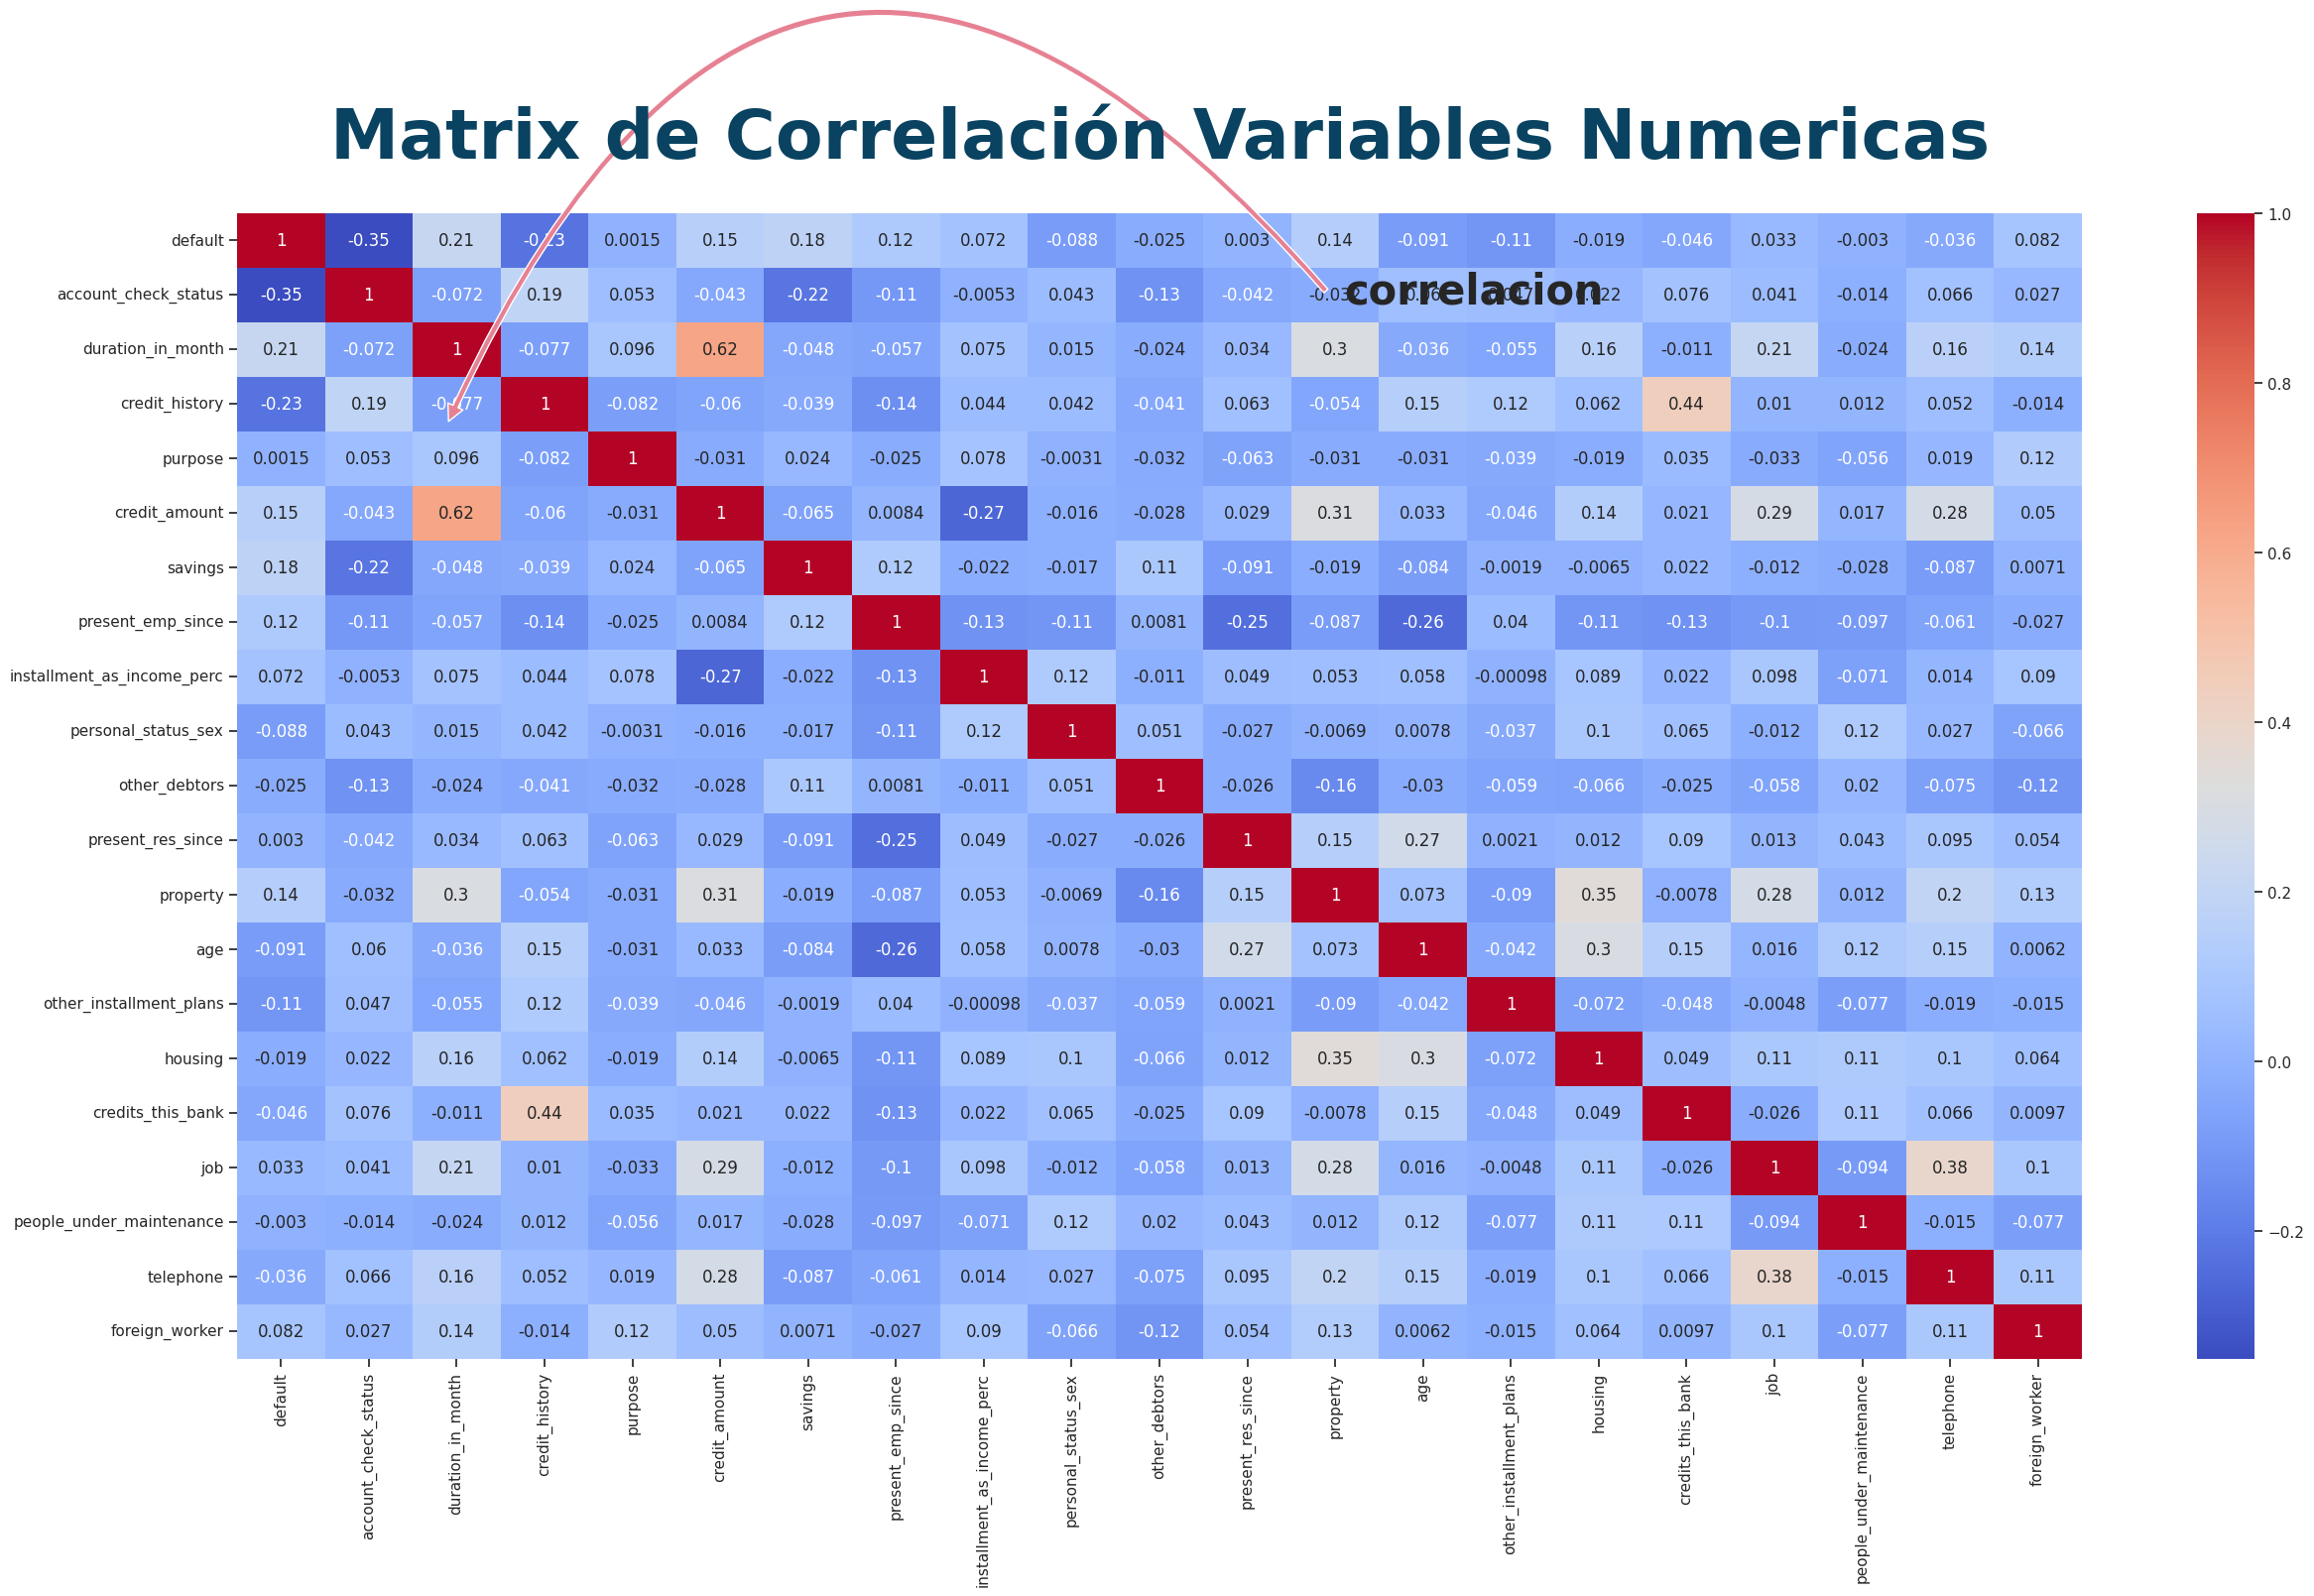

In [97]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [98]:
#Información de los datos
print("Número de filas: ",df_banco.shape[0])
print("Número de Columnas:",df_banco.shape[1])
print("Datos Duplicados",df_banco.duplicated().sum())
print("Variables Categóricas: ",df_banco.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_banco.select_dtypes(exclude='object').shape[1])

Número de filas:  1000
Número de Columnas: 21
Datos Duplicados 0
Variables Categóricas:  0
Variables Numéricas:  21


#**3. Exploración de Datos**


---


In [99]:
variables_discretas = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_banco[variables_discretas].head()

personal_status_sex  age  duration_in_month  credit_amount  default
0                    3   67                  6           1169        0
1                    2   22                 48           5951        1
2                    3   49                 12           2096        0
3                    3   45                 42           7882        0
4                    3   53                 24           4870        1

In [100]:
def feature_engineering():
    global df_banco, resultados

     # Verificar y llenar valores nulos en columnas relevantes
    columns_with_nans = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount']
    df_banco[columns_with_nans] = df_banco[columns_with_nans].fillna(0)  # Puedes cambiar 0 por otro valor por defecto si es necesario

    # Crear una nueva variable 'sexo'
    sexo = {1: 0, 2: 1, 3: 0, 4: 0, 5: 1}
    # Crear una nueva variable 'estado_civil'
    estado_civil={1: 0, 2: 0, 3: 1, 4: 0, 5: 1}
    df_banco['sexo'] = df_banco['personal_status_sex'].map(sexo).astype(int)
    df_banco['estado_civil'] = df_banco['personal_status_sex'].map(estado_civil).astype(int)

     # Crear una nueva variable 'rango_edad'
    bins_edad = [18, 30, 40, 50, 60, 70, 80]
    labels_edad = [1, 2, 3, 4, 5, 6]
    df_banco['rango_edad'] = pd.cut(x=df_banco['age'], bins=bins_edad, labels=labels_edad).astype(int)

    # Crear una nueva variable 'rango_plazos_credito'
    bins_plazos = [0, 12, 24, 36, 48, 60, 72]
    labels_plazos = [1, 2, 3, 4, 5, 6]
    df_banco['rango_plazos_credito'] = pd.cut(x=df_banco['duration_in_month'], bins=bins_plazos, labels=labels_plazos).astype(int)

    # Crear una nueva variable 'rango_valor_credito'
    bins_valor = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
    labels_valor = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    df_banco['rango_valor_credito'] = pd.cut(x=df_banco['credit_amount'], bins=bins_valor, labels=labels_valor)

    # Eliminar las columnas originales
    columnas_a_eliminar = ['personal_status_sex', 'credit_amount']
    df_banco = df_banco.drop(columns=columnas_a_eliminar)

    # Actualizar la variable global resultados si es necesario
    resultados = "Feature engineering completado con éxito"

# Llamada a la función de feature engineering
feature_engineering()

# Puedes imprimir o hacer lo que necesites con df_banco y resultados después de llamar a la función.
df_banco.head()
print(resultados)

Feature engineering completado con éxito


In [101]:
df_banco.head(10)

default  account_check_status  duration_in_month  credit_history  purpose  \
0        0                     1                  6               5        5   
1        1                     2                 48               3        5   
2        0                     4                 12               5        8   
3        0                     1                 42               3        4   
4        1                     1                 24               4        1   
5        0                     4                 36               3        8   
6        0                     4                 24               3        4   
7        0                     2                 36               3        2   
8        0                     4                 12               3        5   
9        1                     2                 30               5        1   

   savings  present_emp_since  installment_as_income_perc  other_debtors  \
0        1                  1                           4              1   
1        5                  3                           2              1   
2        5                  2                           2              1   
3        5                  2                           2              3   
4        5                  3                           3              1   
5        1                  3                           2              1   
6        3                  1                           3              1   
7        5                  3                           2              1   
8        2                  2                           2              1   
9        5                  5                           4              1   

   present_res_since  property  age  other_installment_plans  housing  \
0                  4         1   67                        3        2   
1                  2         1   22                        3        2   
2                  3         1   49                        3        2   
3                  4         2   45                        3        3   
4                  4         4   53                        3        3   
5                  4         4   35                        3        3   
6                  4         2   53                        3        2   
7                  2         3   35                        3        1   
8                  4         1   61                        3        2   
9                  2         3   28                        3        2   

   credits_this_bank  job  people_under_maintenance  telephone  \
0                  2    3                         1          1   
1                  1    3                         1          0   
2                  1    2                         2          0   
3                  1    3                         2          0   
4                  2    3                         2          0   
5                  1    2                         2          1   
6                  1    3                         1          0   
7                  1    4                         1          1   
8                  1    2                         1          0   
9                  2    4                         1          0   

   foreign_worker  sexo  estado_civil  rango_edad  rango_plazos_credito  \
0               1     0             1           5                     1   
1               1     1             0           1                     4   
2               1     0             1           3                     1   
3               1     0             1           3                     4   
4               1     0             1           4                     2   
5               1     0             1           2                     3   
6               1     0             1           4                     2   
7               1     0             1           2                     3   
8               1     0             0           5                     1   
9   

In [102]:
def analisis_exploratorio():
    global df_banco,resultados

    # Generar gráficos de histograma con porcentajes
    atributos_histograma = ['default','account_check_status','credit_history','purpose','savings','present_emp_since','installment_as_income_perc','other_debtors',
            'present_res_since','property','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance','telephone',
            'foreign_worker','sexo','estado_civil','rango_edad','rango_plazos_credito','rango_valor_credito']
    generar_histogramas_plotly(atributos_histograma)

def generar_histogramas_plotly(atributos):
    for atributo in atributos:
        fig = px.histogram(df_banco, x=atributo, color='default', labels={'default': 'Estado de Crédito'})
        fig.update_layout(
            title=f'Histograma de {atributo} con Porcentajes',
            xaxis_title=atributo,
            yaxis_title='Frecuencia',
            barmode='group',
            showlegend=True
        )
        fig.update_traces(opacity=0.7)
        fig.show()

fig.show()

# Llamada a la función de análisis exploratorio
analisis_exploratorio()


In [103]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   default                     1000 non-null   int64   
 1   account_check_status        1000 non-null   int64   
 2   duration_in_month           1000 non-null   int64   
 3   credit_history              1000 non-null   int64   
 4   purpose                     1000 non-null   int64   
 5   savings                     1000 non-null   int64   
 6   present_emp_since           1000 non-null   int64   
 7   installment_as_income_perc  1000 non-null   int64   
 8   other_debtors               1000 non-null   int64   
 9   present_res_since           1000 non-null   int64   
 10  property                    1000 non-null   int64   
 11  age                         1000 non-null   int64   
 12  other_installment_plans     1000 non-null   int64   
 13  housing            

In [104]:
# Convertir la columna "rango_valor_credito" de categórica a numérica
df_banco["rango_valor_credito"] = pd.to_numeric(df_banco["rango_valor_credito"], errors='coerce')
# Reemplazar los valores nulos en la columna "rango_valor_credito" con 0
df_banco["rango_valor_credito"].fillna(0, inplace=True)
# Imprimir el DataFrame después de realizar las modificaciones
print(df_banco["rango_valor_credito"])


0      2.0
1      6.0
2      3.0
3      8.0
4      5.0
      ... 
995    2.0
996    4.0
997    1.0
998    2.0
999    5.0
Name: rango_valor_credito, Length: 1000, dtype: float64


In [105]:
# Biblioteca para balancear los datos utilizando over_sampling
from imblearn.over_sampling import SMOTE

def balanceo_de_datos():
    global df_banco, resultados

    # Dividiendo los datos en características y target
    X = df_banco.drop('default', axis=1)
    y = df_banco['default']

    smt = SMOTE(random_state=123)
    X_resampled, y_resampled = smt.fit_resample(X, y)

    # Unión de los datos balanceados
    df_banco = pd.concat([X_resampled, y_resampled], axis=1)


In [106]:
balanceo_de_datos()

In [107]:
analisis_exploratorio()

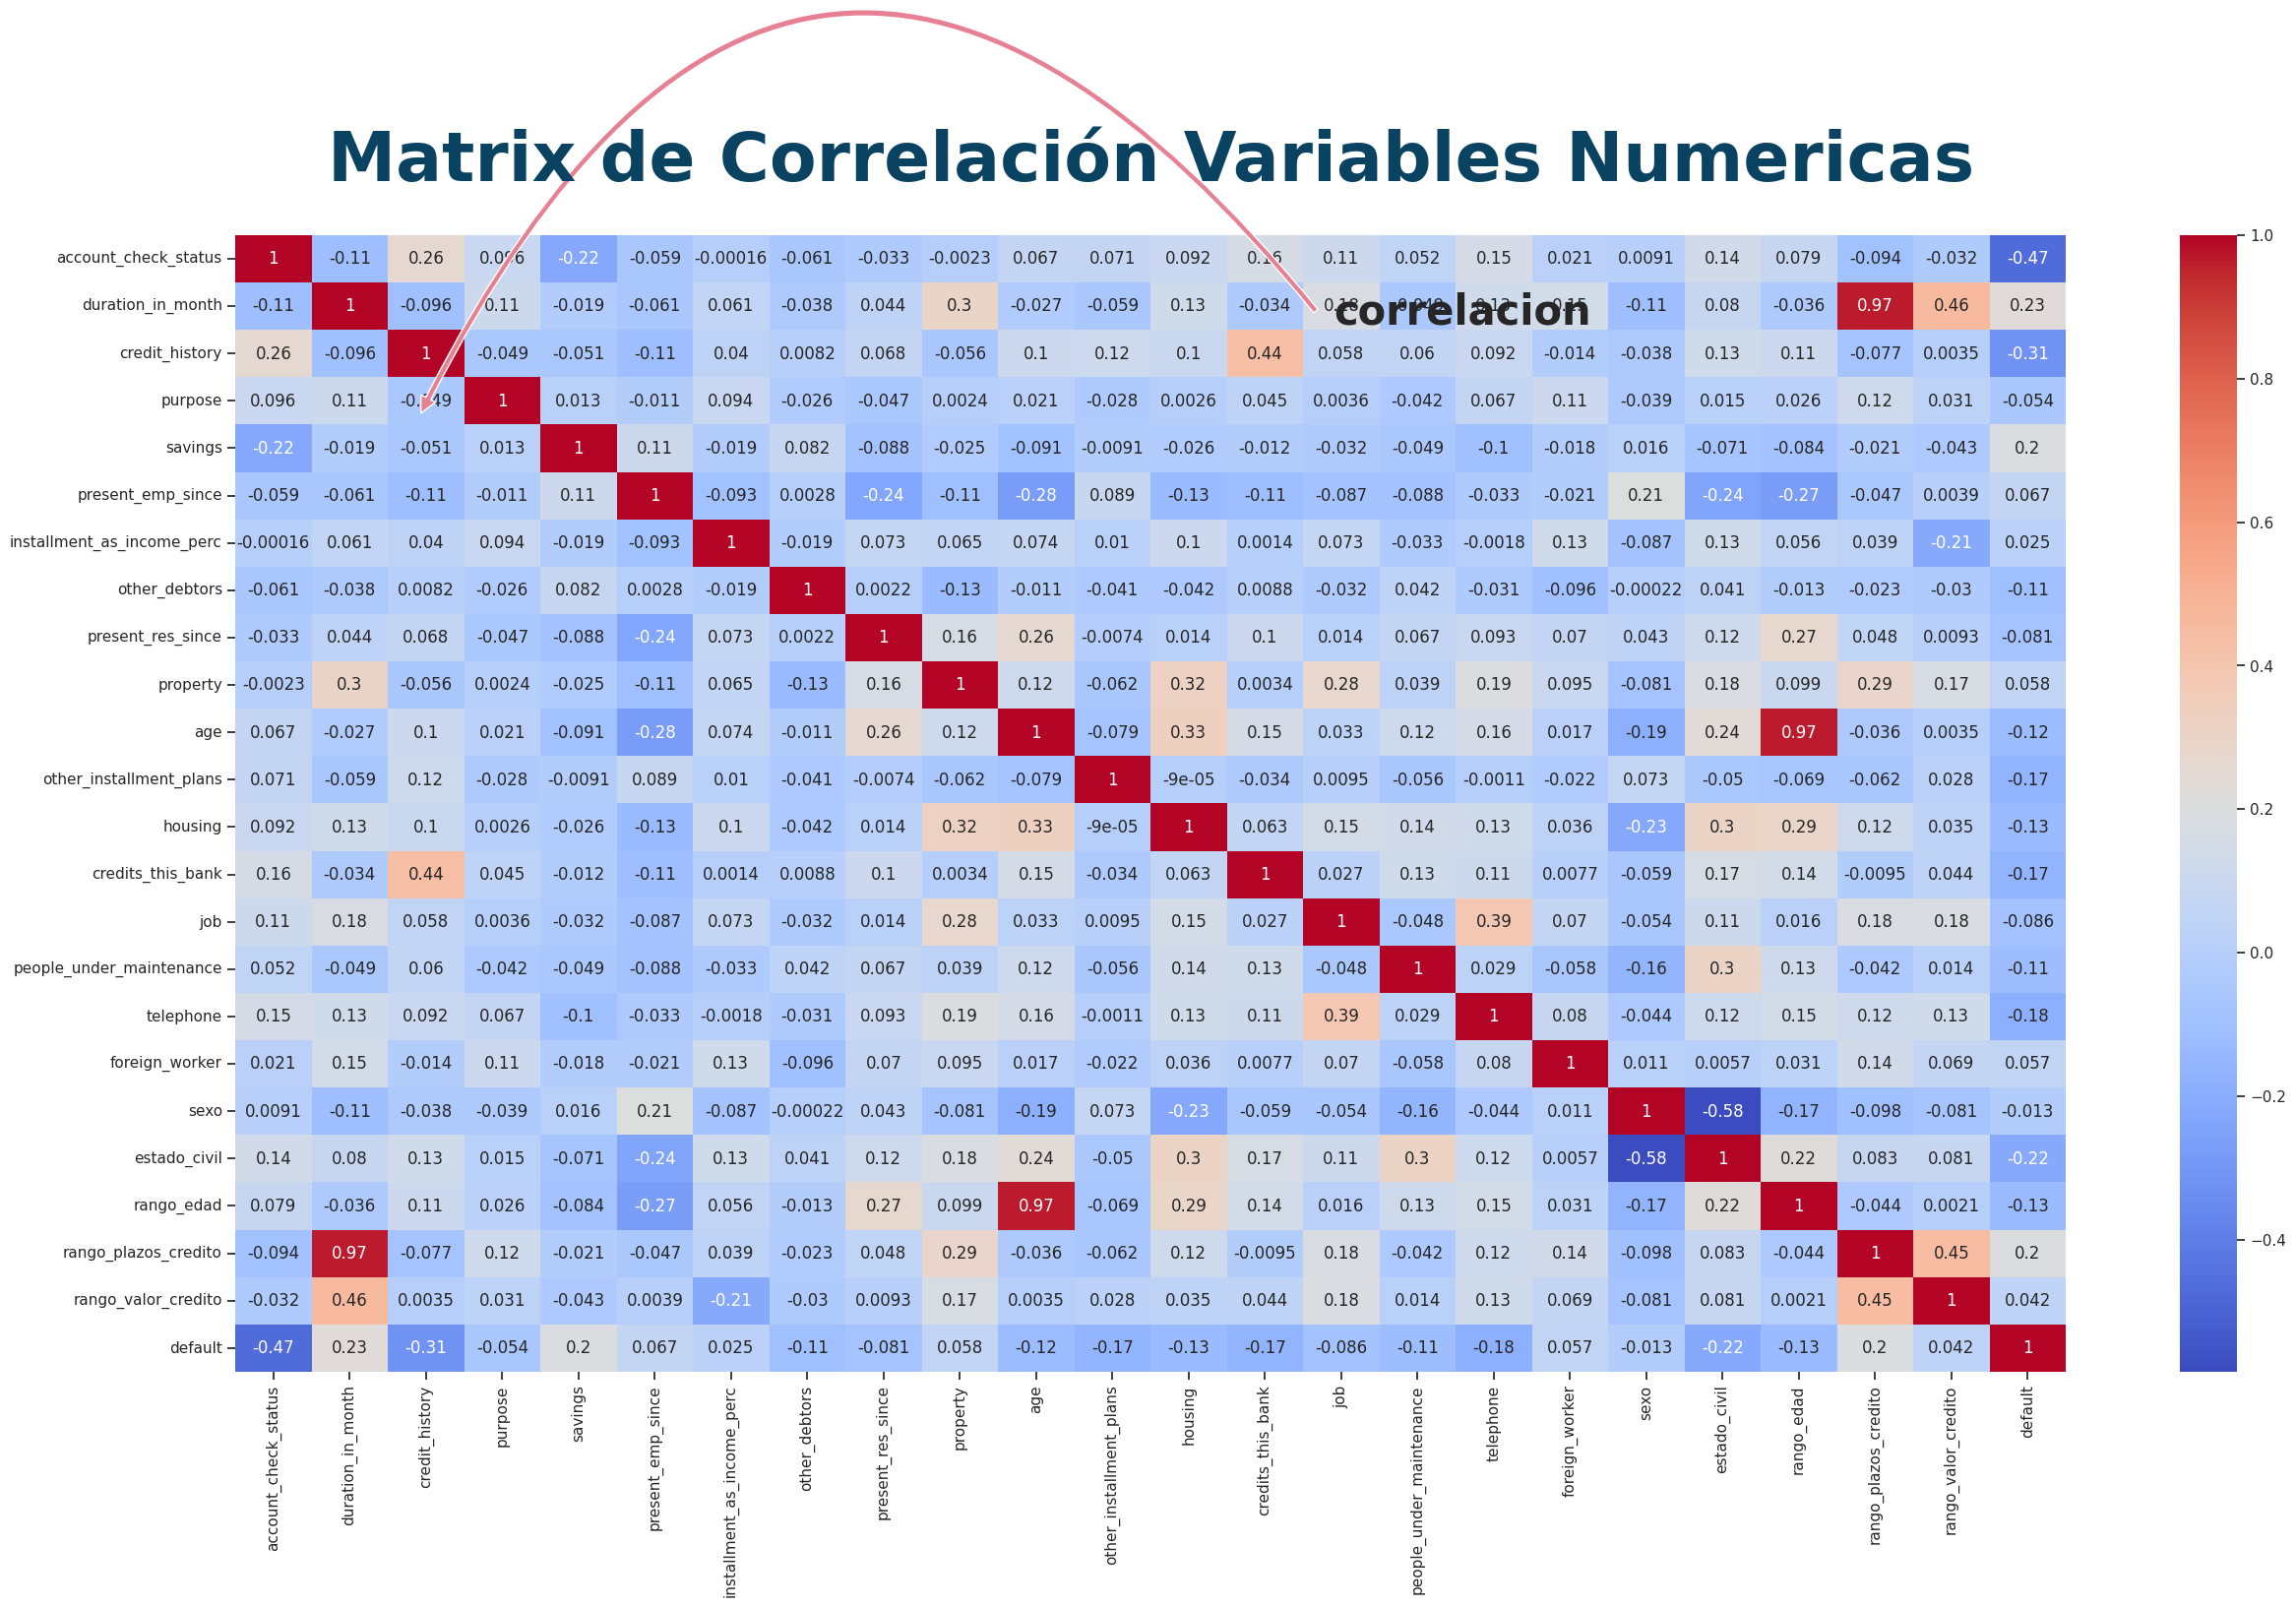

In [108]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [109]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_check_status        1400 non-null   int64  
 1   duration_in_month           1400 non-null   int64  
 2   credit_history              1400 non-null   int64  
 3   purpose                     1400 non-null   int64  
 4   savings                     1400 non-null   int64  
 5   present_emp_since           1400 non-null   int64  
 6   installment_as_income_perc  1400 non-null   int64  
 7   other_debtors               1400 non-null   int64  
 8   present_res_since           1400 non-null   int64  
 9   property                    1400 non-null   int64  
 10  age                         1400 non-null   int64  
 11  other_installment_plans     1400 non-null   int64  
 12  housing                     1400 non-null   int64  
 13  credits_this_bank           1400 

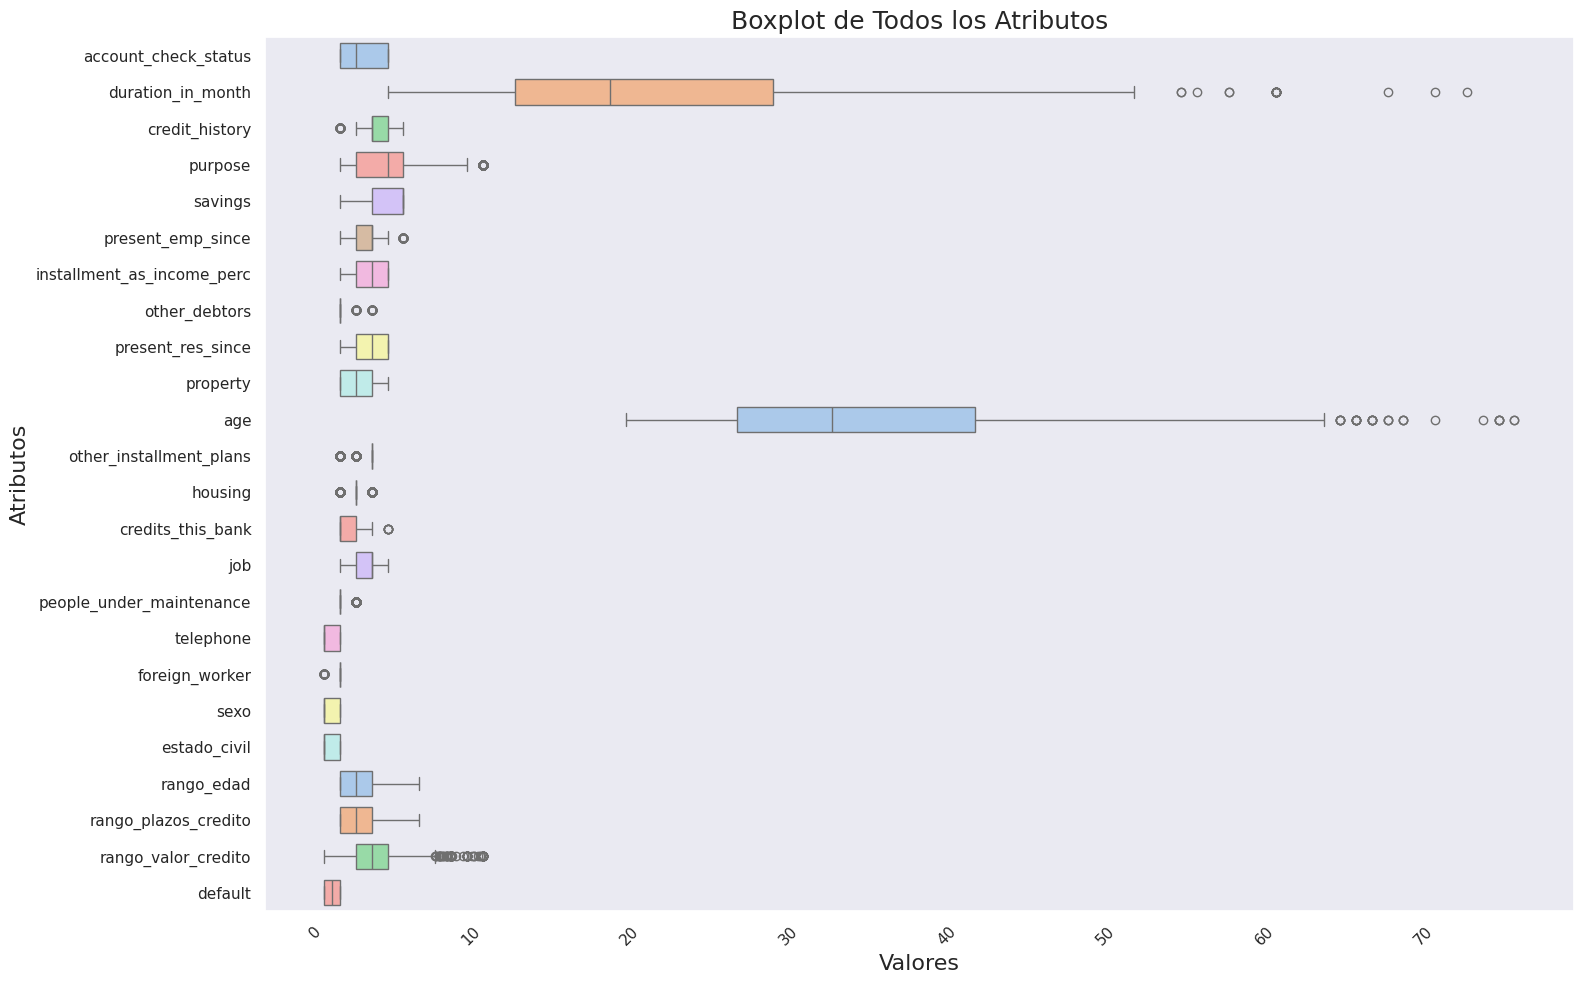

In [110]:
# Configuración de estilo y tamaño
sns.set(style="dark")
plt.figure(figsize=(16, 10))

# Crear un boxplot con Seaborn
sns.boxplot(data=df_banco, orient="h", palette="pastel", width=0.7)

# Personalizar el diseño del gráfico
plt.title('Boxplot de Todos los Atributos', fontsize=18)
plt.xlabel('Valores', fontsize=16)
plt.ylabel('Atributos', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas

# Mostrar el gráfico
plt.show()




In [112]:
print(df_banco.groupby(['estado_civil', 'sexo']).size())

estado_civil  sexo
0             0       354
              1       394
1             0       652
dtype: int64


In [113]:
#Eliminamos la columna sexo del dataFrame
df_banco.drop(['sexo'], axis=1, inplace=True)

In [114]:
df_banco.drop(['telephone'], axis=1, inplace=True)


In [115]:
df_banco.drop(['purpose'], axis=1, inplace=True)

In [116]:
df_banco[df_banco['rango_plazos_credito']==6]

account_check_status  duration_in_month  credit_history  savings  \
677                     2                 72               3        4   

     present_emp_since  installment_as_income_perc  other_debtors  \
677                  3                           2              1   

     present_res_since  property  age  other_installment_plans  housing  \
677                  2         3   24                        3        2   

     credits_this_bank  job  people_under_maintenance  foreign_worker  \
677                  1    3                         1               1   

     estado_civil  rango_edad  rango_plazos_credito  rango_valor_credito  \
677             0           1                     6                  6.0   

     default  
677        1

In [72]:
df_banco[df_banco['rango_edad']==6]

account_check_status  duration_in_month  credit_history  savings  \
186                     2                  9               2        5   
330                     1                 24               5        5   
430                     4                  5               3        5   
536                     1                  6               3        1   
606                     4                 24               5        5   
756                     3                  6               5        5   

     present_emp_since  installment_as_income_perc  other_debtors  \
186                  1                           2              1   
330                  5                           2              1   
430                  2                           1              1   
536                  5                           4              1   
606                  3                           3              1   
756                  3                           1              1   

     present_res_since  property  age  other_installment_plans  housing  \
186                  4         4   74                        1        3   
330                  4         4   75                        3        3   
430                  4         1   74                        3        2   
536                  3         2   75                        3        2   
606                  2         1   74                        3        2   
756                  1         1   74                        3        2   

     credits_this_bank  job  people_under_maintenance  foreign_worker  \
186                  1    4                         2               1   
330                  2    4                         1               1   
430                  1    2                         1               1   
536                  1    4                         1               1   
606                  1    4                         1               1   
756                  3    1                         2               0   

     estado_civil  rango_edad  rango_plazos_credito  rango_valor_credito  \
186             0           6                     1                  6.0   
330             1           6                     2                  7.0   
430             1           6                     1                  4.0   
536             0           6                     1                  2.0   
606             1           6                     2                  5.0   
756             1           6                     1                  2.0   

     default  
186        1  
330        0  
430        0  
536        0  
606        0  
756        0

In [117]:
# Eliminar todas las filas donde 'rango_edad' es igual a 6
df_banco = df_banco[(df_banco['rango_edad'] != 6)].reset_index(drop=True)
df_banco = df_banco[(df_banco['rango_plazos_credito'] != 6)].reset_index(drop=True)

In [118]:
df_banco.columns

Index(['account_check_status', 'duration_in_month', 'credit_history',
       'savings', 'present_emp_since', 'installment_as_income_perc',
       'other_debtors', 'present_res_since', 'property', 'age',
       'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'foreign_worker', 'estado_civil',
       'rango_edad', 'rango_plazos_credito', 'rango_valor_credito', 'default'],
      dtype='object')

In [125]:
def analisis_exploratorio2():
    global df_banco,resultados

    # Generar gráficos de histograma con porcentajes
    atributos_histograma = columnas=['account_check_status','credit_history','savings','present_emp_since','installment_as_income_perc','other_debtors',
            'present_res_since','property','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance',
            'foreign_worker','estado_civil','rango_edad','rango_plazos_credito','rango_valor_credito']
    generar_histogramas_plotly(atributos_histograma)

def generar_histogramas_plotly(atributos):
    for atributo in atributos:
        fig = px.histogram(df_banco, x=atributo, color='default', labels={'default': 'Estado de Crédito'})
        fig.update_layout(
            title=f'Histograma de {atributo} con Porcentajes',
            xaxis_title=atributo,
            yaxis_title='Frecuencia',
            barmode='group',
            showlegend=True
        )
        fig.update_traces(opacity=0.7)
        fig.show()

fig.show()

# Llamada a la función de análisis exploratorio
analisis_exploratorio2()


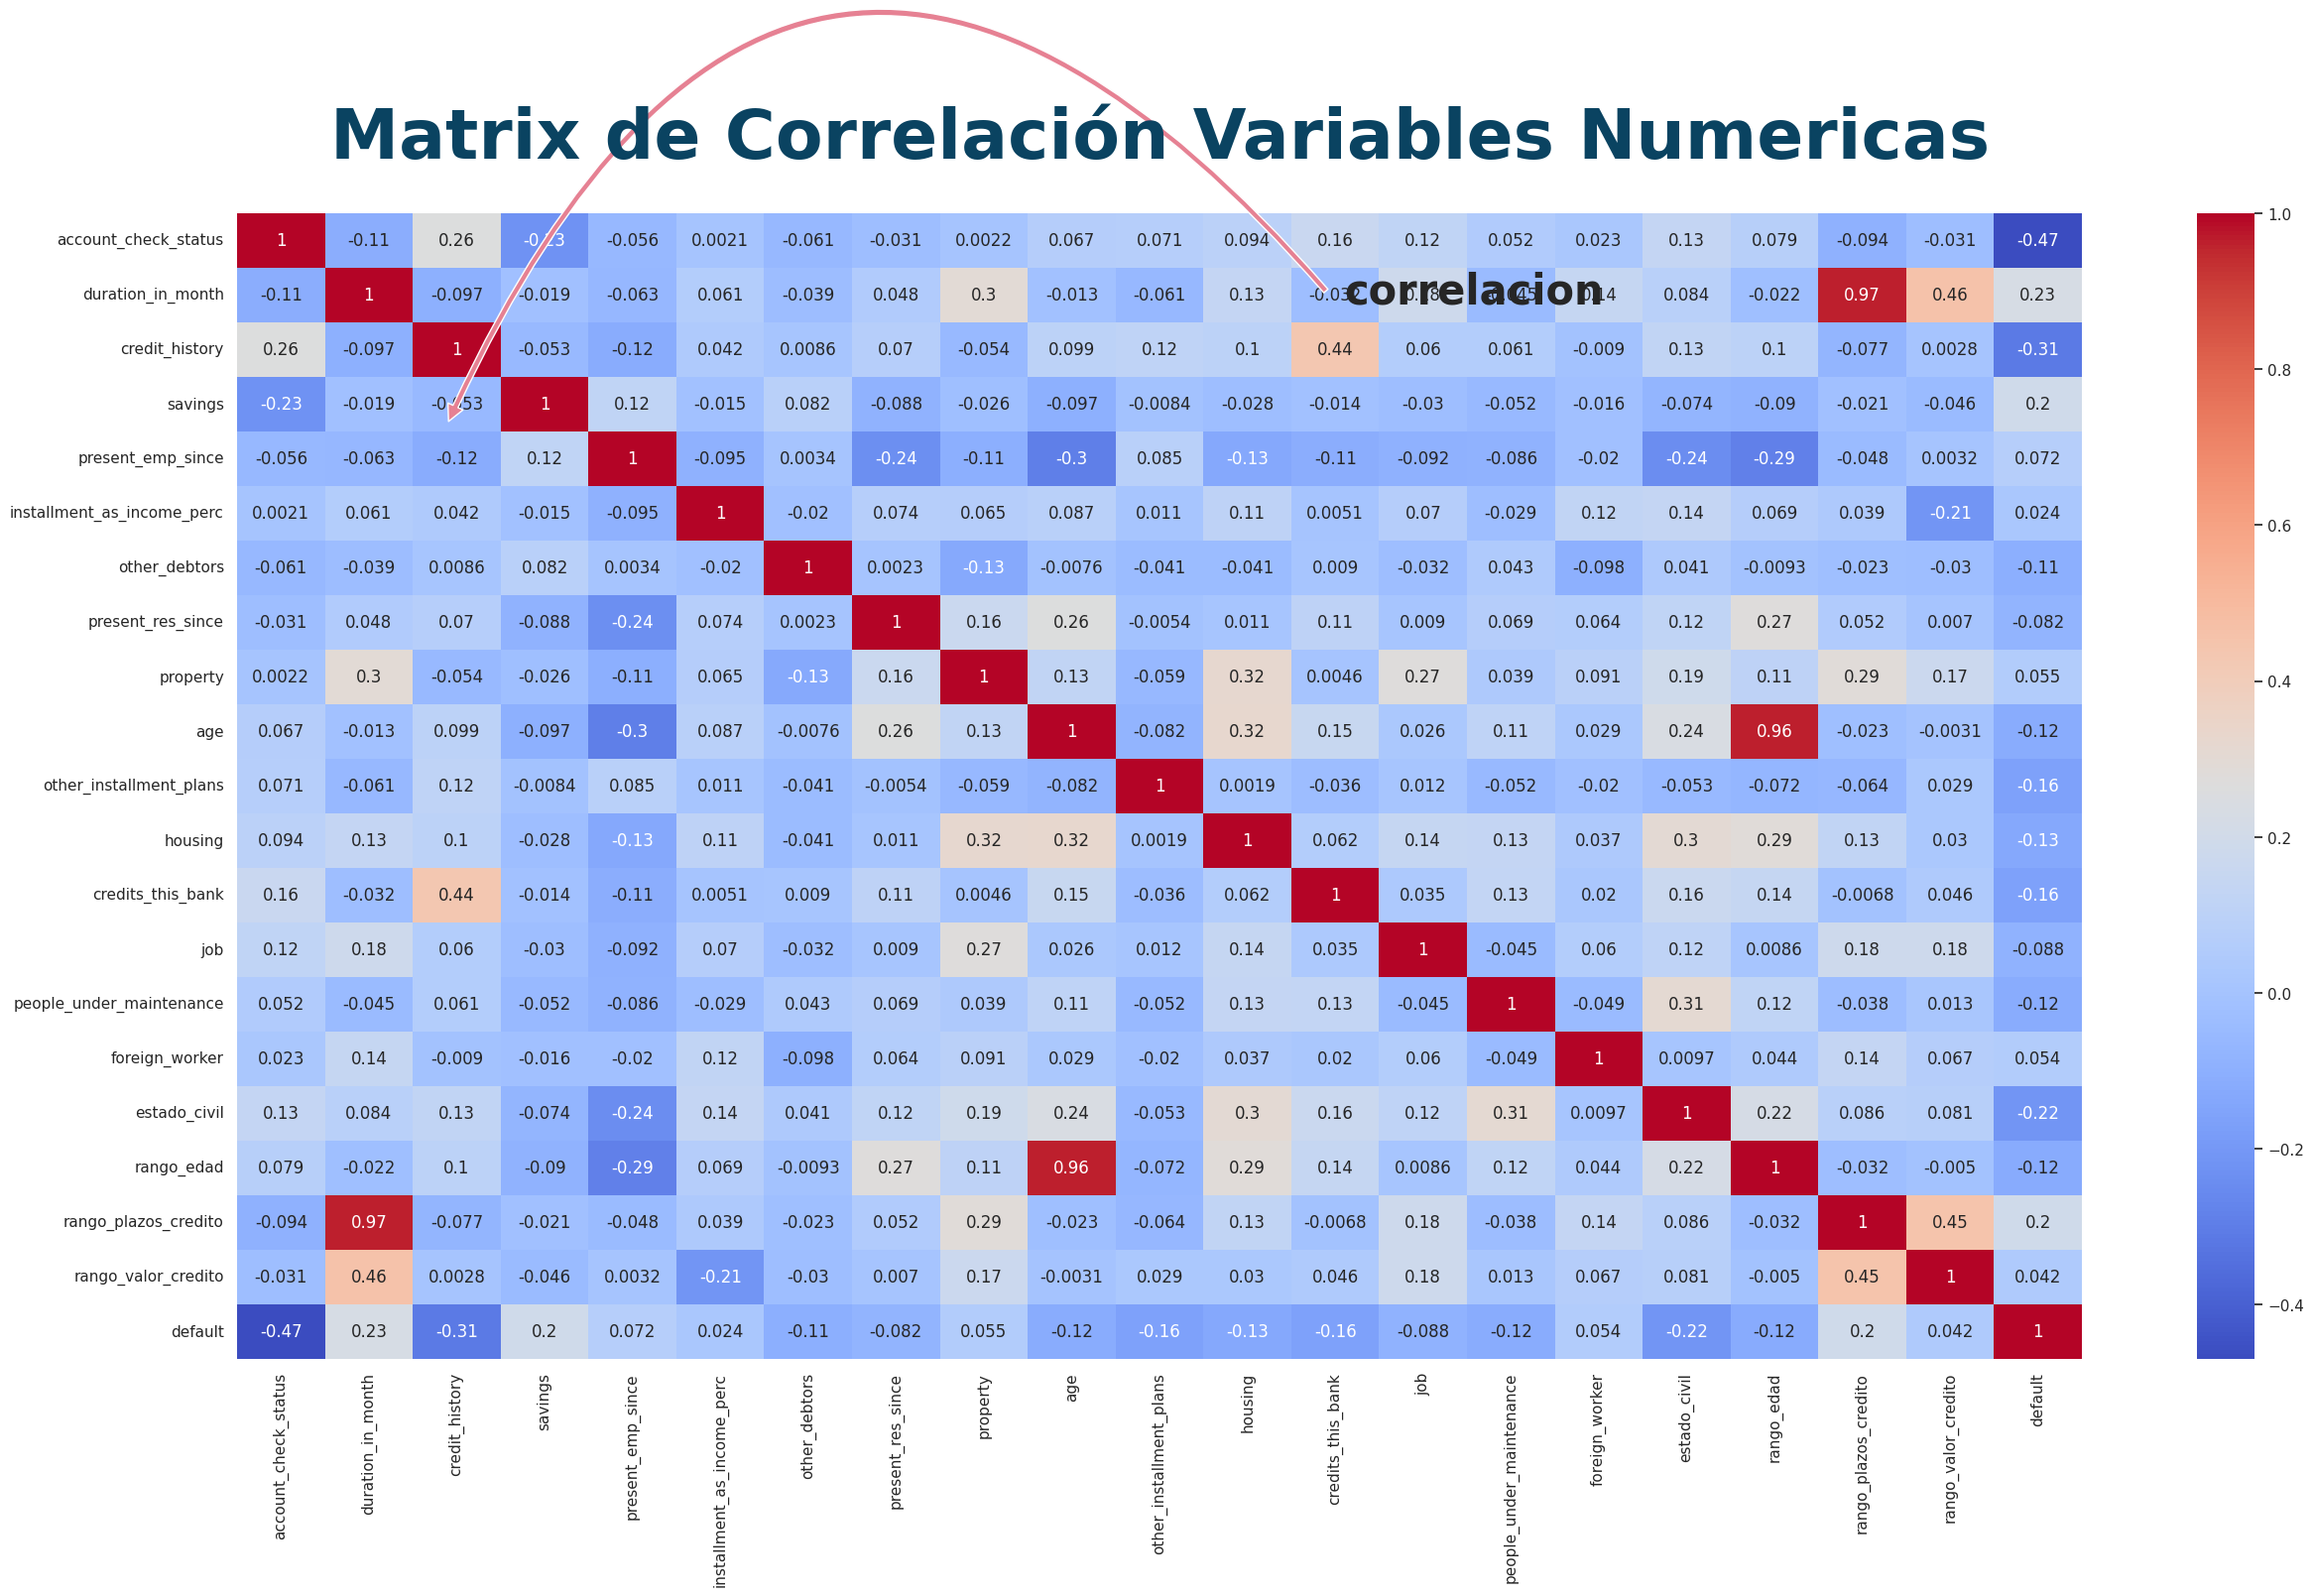

In [126]:
#Correlación Entre Variables Numéricas
corr=df_banco.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#Configuramos las etiquetas del eje y con los nombres de las columnas del DataFrame.
ax.set_yticklabels(df_banco.corr(), rotation = 0)
ax.set_xticklabels(df_banco.corr())

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

#Añadimos una anotacion indicando una correlación
ax.annotate('correlacion',
                    fontsize=30,fontweight='bold',
                    xy=(2.3, 4.2), xycoords='data',
                    xytext=(0.6, 0.95), textcoords='axes fraction',
                    arrowprops=dict(
                    facecolor=theme[4], shrink=0.025,
                    connectionstyle='arc3, rad=0.80'),
                    horizontalalignment='left', verticalalignment='top'
)

ax.set_title('Matrix de Correlación Variables Numericas', size = 50, color = theme[3], weight='bold', pad=40);
plt.show()

In [127]:
df_banco["default"].value_counts()

1    698
0    695
Name: default, dtype: int64

In [128]:
# Obtener la cuenta de valores únicos en la columna 'default'
value_counts = df_banco["default"].value_counts()

# Crear un gráfico de barras con Plotly Express
fig = px.bar(x=value_counts.index, y=value_counts.values, text=value_counts.values,
             labels={'x': 'default', 'y': 'Count'}, title='Cuenta de valores en la columna "default"')

# Mostrar el gráfico
fig.show()


In [131]:
corr = df_banco.corr()
corr[['default']].sort_values(by='default',ascending=False).style.background_gradient()

In [132]:
## Cuadro de correlación mostrando de forma colorida los valores entre variables
corr = df_banco.corr()
corr.style.background_gradient()